In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

In [97]:
!wget "https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv"

--2022-07-14 12:03:56--  https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4011195 (3.8M) [text/plain]
Saving to: ‘TaxiFare.csv’

TaxiFare.csv        100%[===================>]   3.83M   307KB/s    in 16s     

2022-07-14 12:04:14 (241 KB/s) - ‘TaxiFare.csv’ saved [4011195/4011195]



In [98]:
df = pd.read_csv('TaxiFare.csv')

In [99]:
##Basic Stuff
df.info()
df.head(5)
df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [100]:
##Check null values
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [101]:
##Features in tabular format
df.describe().T ##transpose

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000


In [102]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [103]:
## Exploration of dataset
print("Fare amount greater than 10$ :", df[df["amount"]>=10].shape[0])
df[df["amount"] >=10]


Fare amount greater than 10$ : 19558


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
16,22:00.0,12.5,2014-02-19 07:22:00 UTC,-73.986430,40.760465,-73.988990,40.737075,1
20,18:00.0,10.5,2010-09-07 13:18:00 UTC,-73.985382,40.747858,-73.978377,40.762070,1
...,...,...,...,...,...,...,...,...
49987,24:00.0,16.5,2014-03-17 11:24:00 UTC,-73.992928,40.748422,-73.963497,40.774297,1
49989,42:00.0,17.3,2011-12-07 21:42:00 UTC,-73.998573,40.719868,-73.967462,40.793382,1
49991,56:19.0,10.5,2013-10-17 19:56:19 UTC,-73.991685,40.739494,-73.985357,40.731971,1
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1


In [104]:
df["date_time_of_pickup"]=pd.to_datetime(df["date_time_of_pickup"]) #since datetime was an object type, conv to datetime type to work


In [105]:
df.head() #will show in timestamps instead of UTC

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [106]:
from math import radians, cos,sin, asin,sqrt

## Haversine Distance calculation
def distance(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))
    
    
d = []
for i in range(df.shape[0]):
    d.append(distance(df["latitude_of_pickup"][i],
                      df["latitude_of_dropoff"][i],
                      df["longitude_of_pickup"][i],
                      df["longitude_of_dropoff"][i]))

In [107]:
df["distance in kilometres"]=d

In [108]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance in kilometres
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.36


In [109]:
## We don't need coordinates/ unique IDs anymore,we'll work with the distance feature
df.drop(["unique_id","latitude_of_pickup", "longitude_of_pickup", "latitude_of_dropoff", "longitude_of_dropoff"], axis=1, inplace=True)
df.head() #seems like a cleaned dataset, enough to infer values

,amount,date_time_of_pickup,no_of_passenger,distance in kilometres
0,4.5,2009-06-15 17:26:21+00:00,1,0.41
1,16.9,2010-01-05 16:52:16+00:00,1,4.63
2,5.7,2011-08-18 00:35:00+00:00,2,1.00
3,7.7,2012-04-21 04:30:42+00:00,1,0.91
4,5.3,2010-03-09 07:51:00+00:00,1,1.36


In [110]:
print("Date in data : ", df["date_time_of_pickup"].dt.day.sort_values().unique())
print("Month in data : ", df["date_time_of_pickup"].dt.month.unique()[0])
print("Year in data : ", df["date_time_of_pickup"].dt.year.unique()[0])


Date in data :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month in data :  6
Year in data :  2009


In [111]:
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

df["weekday_name"] = df["date_time_of_pickup"].dt.weekday.map(week_names)
df.head()


,amount,date_time_of_pickup,no_of_passenger,distance in kilometres,weekday_name
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,Sunday
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,Monday
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,Wednesday
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,Friday
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,Monday


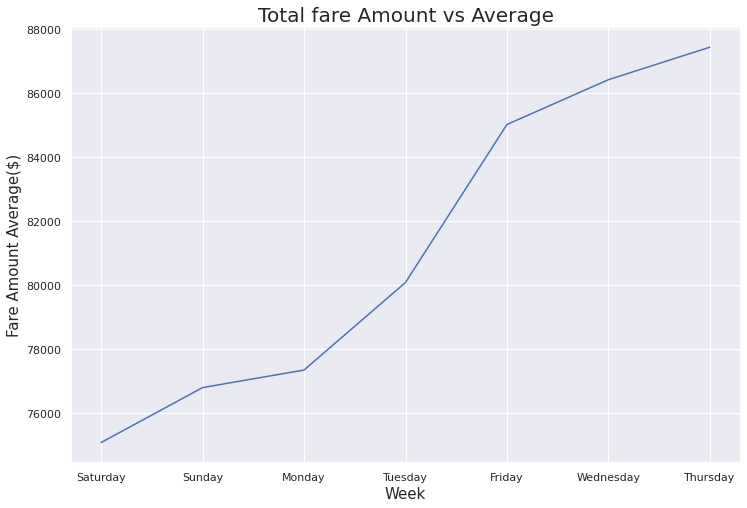

In [112]:
plt.figure(figsize = (12,8))
df.groupby("weekday_name")["amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average($)", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

In [113]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}
df["weekday_name"] = df["weekday_name"].map(week_names_encode)
df.head()

,amount,date_time_of_pickup,no_of_passenger,distance in kilometres,weekday_name
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3


In [114]:
df["Hour"] = df["date_time_of_pickup"].dt.hour
df["Hour"].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5])

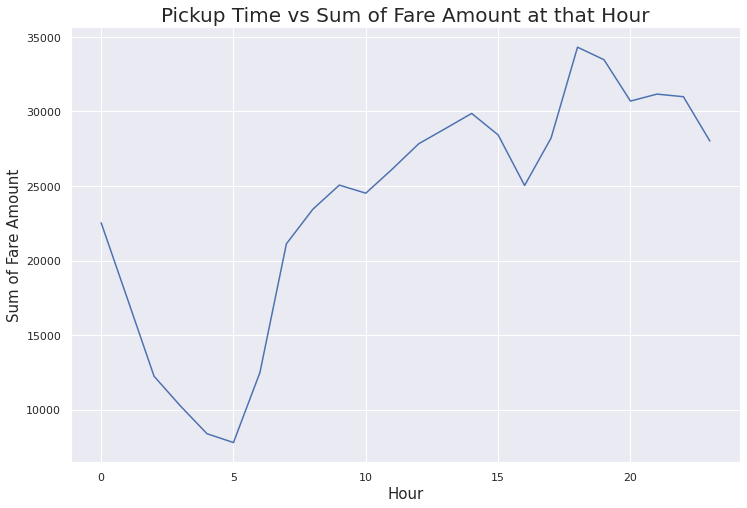

In [115]:
plt.figure(figsize = (12,8))

df.groupby("Hour")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.show()



In [116]:
df["Month_Day"] = df["date_time_of_pickup"].dt.day
# Sum of Taxi Fare in a particular day

for day in list(df["date_time_of_pickup"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total fare Amount : ${round(df[df.date_time_of_pickup.dt.day==day].amount.sum(), 2)}")


Date : 1 	 Total fare Amount : $17229.03
Date : 2 	 Total fare Amount : $17711.51
Date : 3 	 Total fare Amount : $17887.56
Date : 4 	 Total fare Amount : $16871.76
Date : 5 	 Total fare Amount : $18426.86
Date : 6 	 Total fare Amount : $18898.4
Date : 7 	 Total fare Amount : $19953.12
Date : 8 	 Total fare Amount : $19773.47
Date : 9 	 Total fare Amount : $19096.83
Date : 10 	 Total fare Amount : $19103.29
Date : 11 	 Total fare Amount : $18543.99
Date : 12 	 Total fare Amount : $20143.27
Date : 13 	 Total fare Amount : $19773.21
Date : 14 	 Total fare Amount : $18941.62
Date : 15 	 Total fare Amount : $19425.37
Date : 16 	 Total fare Amount : $19864.5
Date : 17 	 Total fare Amount : $19498.61
Date : 18 	 Total fare Amount : $19117.84
Date : 19 	 Total fare Amount : $19866.99
Date : 20 	 Total fare Amount : $18862.46
Date : 21 	 Total fare Amount : $20123.13
Date : 22 	 Total fare Amount : $18670.33
Date : 23 	 Total fare Amount : $18803.67
Date : 24 	 Total fare Amount : $18053.6
Date

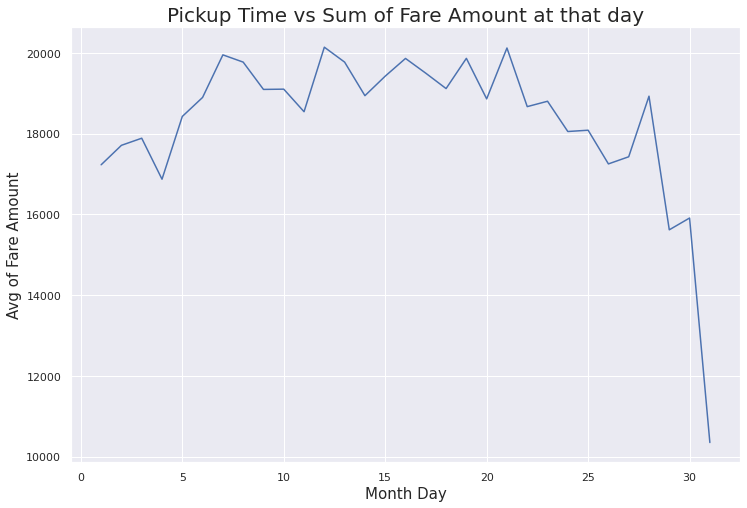

In [117]:
plt.figure(figsize = (12, 8))

df.groupby("Month_Day")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [118]:
df.head() #dataset

,amount,date_time_of_pickup,no_of_passenger,distance in kilometres,weekday_name,Hour,Month_Day
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17,15
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16,5
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0,18
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4,21
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7,9


In [119]:
data["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

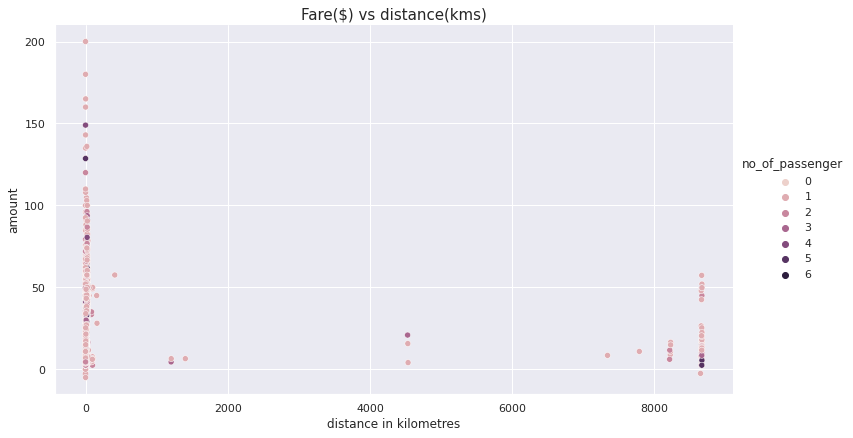

In [120]:
sns.relplot(data = df, kind = "scatter",x = "distance in kilometres",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

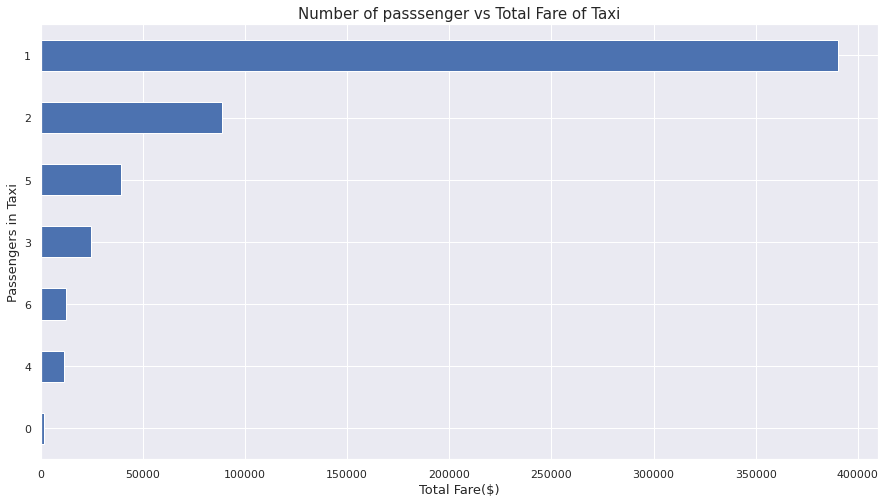

In [121]:
plt.figure(figsize=(15,8))
df.groupby("no_of_passenger")["amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

In [122]:
df.drop("date_time_of_pickup", axis=1, inplace=True)

In [123]:
df.head()

,amount,no_of_passenger,distance in kilometres,weekday_name,Hour,Month_Day
0,4.5,1,0.41,1,17,15
1,16.9,1,4.63,3,16,5
2,5.7,2,1.00,6,0,18
3,7.7,1,0.91,5,4,21
4,5.3,1,1.36,3,7,9


In [124]:
df.to_csv("taxifare_transformed.csv", index=False)

In [6]:
##Now we will work with the transformed csv as our new dataframe
df1 = pd.read_csv("taxifare_transformed.csv")

In [7]:
df1.head()

,amount,no_of_passenger,distance in kilometres,weekday_name,Hour,Month_Day
0,4.5,1,0.41,1,17,15
1,16.9,1,4.63,3,16,5
2,5.7,2,1.00,6,0,18
3,7.7,1,0.91,5,4,21
4,5.3,1,1.36,3,7,9


In [8]:
# Separating dependent and independent feature
#### Dependent Feature ---> amount

X = df1.iloc[: , 1:]
Y = df1.iloc[: , 0]

In [9]:
X.head()

,no_of_passenger,distance in kilometres,weekday_name,Hour,Month_Day
0,1,0.41,1,17,15
1,1,4.63,3,16,5
2,2,1.00,6,0,18
3,1,0.91,5,4,21
4,1,1.36,3,7,9


In [10]:
Y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: amount, dtype: float64

In [52]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.33)


In [55]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept= True, normalize =True)
import warnings
warnings.filterwarnings('ignore')
linreg.fit(X_train , Y_train)
predict = linreg.predict(X_test)
r2_score(Y_test,predict)

0.000880402027300442

In [19]:
print("In-sample Score in Linear Regression : ",linreg.score(X_train,Y_train))

Score in Linear Regression :  0.0009957379256853027


In [68]:
print("Out-sample Score in Linear Regression : ",linreg.score(X_test,Y_test))

Out-sample Score in Linear Regression :  0.000880402027300442


In [58]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
# fit the model on the data
regressor.fit(X_train, Y_train)


SVR()

In [96]:
predict=regressor.predict(X_test)
r2_score(Y_test,predict)

0.2984628192419282

In [66]:
print("Out-Sample Score using SVM Regression : ",regressor.score(X_test,Y_test))

Score using SVM Regression :  0.2984628192419282


In [67]:
print("In-Sample Score using SVM Regression : ",regressor.score(X_train,Y_train))

Score using SVM Regression :  0.31803351701978566


In [85]:
##implement random forest
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 15)
rfreg.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=15)

In [86]:
predict = rfreg.predict(X_test)

In [94]:
r2_score(predict,Y_test)

0.420911282731005

In [88]:
print("In-Sample Score in Random Forest Regression : ",rfreg.score(X_train,Y_train))

In-Sample Score in Random Forest Regression :  0.9357301010037038


In [93]:
print("Out-Sample Score in Random Forest Regression : ",rfreg.score(X_test,Y_test))

Out-Sample Score in Random Forest Regression :  0.5898137233982822


In [90]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=42)
dt_reg.fit(X_train, Y_train)
#mean squared error will be optimal in such situations
pred = dt_reg.predict(X_test)
r2_score(pred,Y_test)

0.289098104630075

In [74]:
print("In-sample Score in Decision Tree Regressor : ",dt_reg.score(X_train,Y_train))

In-sample Score in Decision Tree Regressor :  0.9966609742631071


In [75]:
print("Out-sample Score in Decision Tree Regressor : ",dt_reg.score(X_test,Y_test))

Out-sample Score in Decision Tree Regressor :  0.3021316942194703


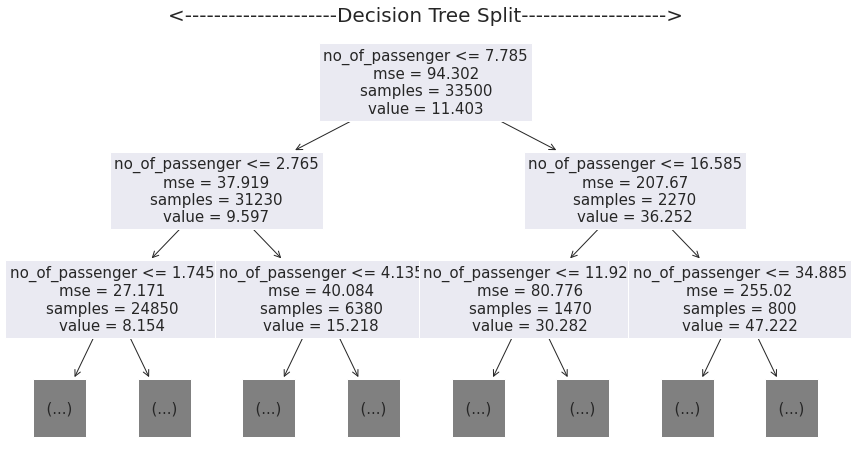

In [76]:
from sklearn import tree
plt.figure(figsize = (15,8))
tree.plot_tree(dt_reg, max_depth = 2, fontsize = 15, feature_names=df1.columns)
plt.title("<---------------------Decision Tree Split-------------------->", fontsize = 20)
plt.show()

In [102]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.761902880952153
RMSE value for k=  2 is: 6.890978038293434
RMSE value for k=  3 is: 6.546890643476726
RMSE value for k=  4 is: 6.387291502912782
RMSE value for k=  5 is: 6.26200343828482
RMSE value for k=  6 is: 6.220706509603192
RMSE value for k=  7 is: 6.169404634201514
RMSE value for k=  8 is: 6.140762922207742
RMSE value for k=  9 is: 6.11421361262922
RMSE value for k=  10 is: 6.091693841328933
RMSE value for k=  11 is: 6.074929109227839
RMSE value for k=  12 is: 6.058944442071109
RMSE value for k=  13 is: 6.049822541980608
RMSE value for k=  14 is: 6.038927399911663
RMSE value for k=  15 is: 6.033299251643233
RMSE value for k=  16 is: 6.022887357264802
RMSE value for k=  17 is: 6.017481941594538
RMSE value for k=  18 is: 6.009452970540999
RMSE value for k=  19 is: 6.008438382184874
RMSE value for k=  20 is: 5.999742003398853
RMSE value for k=  21 is: 5.994584699083987
RMSE value for k=  22 is: 5.990933836281597
RMSE value for k=  23 is: 5.989579492767216

In [106]:
#k=32 is the lowest, after that it shoots up
#lets find for the test model
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[27,28,29,30,31,32,33,34,35,36,37,38,39,40]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_




{'n_neighbors': 34}

In [ ]:
#not quite a difference with the trained model

In [107]:
model = neighbors.KNeighborsRegressor(n_neighbors = 34)
model.fit(X_train, Y_train)  #fit the model
pred=model.predict(X_test)
r2_score(pred,Y_test)

0.35748740878127494

In [108]:
print("In-sample Score in KNN Regressor : ",model.score(X_train,Y_train))

In-sample Score in KNN Regressor :  0.6732797910958835


In [109]:
print("In-sample Score in KNN Regressor : ",model.score(X_test,Y_test))

In-sample Score in KNN Regressor :  0.6145646980200474


In [51]:
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor(n_estimators=100,base_estimator=dt_reg)
bag_reg.fit(X_train,Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      random_state=42),
                 n_estimators=100)

In [80]:
Y_pred = bag_reg.predict(X_test)
r2_score(Y_pred, Y_test)


0.7781023763864243

In [78]:
print("In-sample Score in Bagging Regression : ",bag_reg.score(X_train,Y_train))

In-sample Score in Bagging Regression :  0.8476800220387971


In [79]:
print("Out-sample Score in Bagging Regression : ",bag_reg.score(X_test,Y_test))

Out-sample Score in Bagging Regression :  0.8299496719847087


In [53]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor(learning_rate= 0.30, n_estimators=100)
ada_reg.fit(X_train,Y_train)
Y_pred = bag_reg.predict(X_test)
r2_score(Y_pred, Y_test)

0.7781023763864243

In [54]:
print("Score in ADABoost Regression : ",ada_reg.score(X_train,Y_train))

Score in ADABoost Regression :  0.5639992094092112


In [30]:
#we will use xgboost for the supervised model
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(learning_rate= 0.30, max_depth=6, n_estimators=100, n_jobs =0)
xgb_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [81]:
Y_pred = xgb_reg.predict(X_test)
r2_score(Y_pred, Y_test)



0.6032645661997874

In [82]:
print("In-sample Score in XGBoost Regression : ",xgb_reg.score(X_train,Y_train))

In-sample Score in XGBoost Regression :  0.7579663873854425


In [83]:
print("Out-sample Score in XGBoost Regression : ",xgb_reg.score(X_test,Y_test))

Out-sample Score in XGBoost Regression :  0.719824322007606


In [143]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
##configs
n_estimators = [40,80,120,160]

criterion = ["mse","mae"]

max_depth = [int(x) for x in np.linspace(10,200,10)]

min_samples_split= [5,10,15]

min_samples_leaf = [4,6,8,10]

max_features = ['auto', 'sqrt', 'log2']
param_grid = {"n_estimators":n_estimators, "criterion":criterion, "max_depth":max_depth, "min_samples_split":
             min_samples_split, "min_samples_leaf":min_samples_leaf, "max_features":max_features}

In [146]:
rf_hyper = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf_hyper, param_distributions=param_grid, n_iter=10, 
                                 cv = 2, verbose=1, random_state=100, n_jobs=-1)



rf_randomcv.fit(X_train,Y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/usr/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and w

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [4, 6, 8, 10],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [40, 80, 120, 160]},
                   random_state=100, verbose=1)

In [145]:
import pickle
filename = 'randomforest_Taxifare_model.pkl'

pickle.dump(rfreg, open(filename,'wb'))
